<a href="https://colab.research.google.com/github/shipra-saxena/miniature-potato/blob/master/cifar10_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
% matplotlib inline
np.random.seed(2019) 
import numpy as np
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot

In [0]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


In [0]:
from tensorflow.image import rgb_to_grayscale 
from tensorflow import Session as sess
X_train=rgb_to_grayscale(X_train)
X_test=rgb_to_grayscale(X_test)

In [0]:
from tensorflow import InteractiveSession
sess = InteractiveSession()

/home/dbda/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
X_train = X_train.eval()
X_test = X_test.eval()


In [0]:
img_rows, img_cols=  X_train.shape[1],X_train.shape[2]

In [0]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
#hotone encoding
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalization of data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [0]:
model = deep_cnn()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 50)        500       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 50)        22550     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 50)        22550     
_________________________________________________________________
activation_9 (Activation)    (None, 16, 16, 50)        0         
__________

In [0]:
%%time
history = model.fit(X_train, Y_train, batch_size = 50, validation_split = 0.2, epochs = 10, verbose =1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 246s 6ms/step - loss: 1.5536 - acc: 0.4367 - val_loss: 1.3308 - val_acc: 0.5312
Epoch 2/10
40000/40000 [==============================] - 246s 6ms/step - loss: 1.1686 - acc: 0.5911 - val_loss: 1.0818 - val_acc: 0.6212
Epoch 3/10
40000/40000 [==============================] - 249s 6ms/step - loss: 0.9616 - acc: 0.6655 - val_loss: 1.0402 - val_acc: 0.6370
Epoch 4/10
40000/40000 [==============================] - 251s 6ms/step - loss: 0.8367 - acc: 0.7108 - val_loss: 0.8577 - val_acc: 0.7021
Epoch 5/10
40000/40000 [==============================] - 253s 6ms/step - loss: 0.7517 - acc: 0.7427 - val_loss: 0.8397 - val_acc: 0.7112
Epoch 6/10
40000/40000 [==============================] - 253s 6ms/step - loss: 0.6768 - acc: 0.7682 - val_loss: 0.8255 - val_acc: 0.7218
Epoch 7/10
40000/40000 [==============================] - 253s 6ms/step - loss: 0.6177 - acc: 0.7879 - val_loss: 0.7953 - 

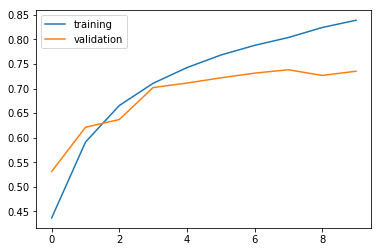

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()